In [2]:
import scipy as sc
import imp
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.integrate import quad
%matplotlib inline

# Solution of the Fredholm integral equtation

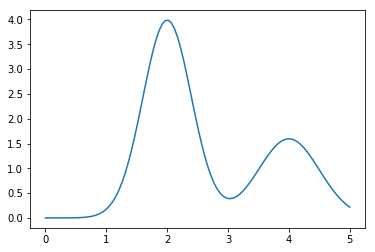

In [3]:
a = 0
b = 5

phi = lambda x: 4*norm.pdf(x-2, scale=0.4) + 2*norm.pdf(x-4, scale = 0.5)
x = np.linspace(a, b,100)
plt.plot(x, phi(x));

In [4]:
kernel = lambda x,y : np.heaviside(x-y, 1)

In [5]:
convolution =  np.vectorize(lambda y: quad(lambda x: kernel(x,y)*phi(x), a,b)[0])

In [6]:
y = np.linspace(a, b, 50)

In [7]:
ftrue = convolution(y)

In [8]:
sig = 0.05*ftrue +0.01

In [9]:
f = ftrue + norm.rvs(loc = ftrue, scale=sig)

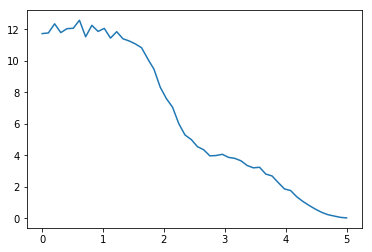

In [25]:
plt.plot(y,f);

In [12]:
from statreg.model import GaussErrorUnfolder
from statreg.basis import CubicSplines

In [13]:
basis = CubicSplines(y, boundary='dirichlet')

In [14]:
model = GaussErrorUnfolder(basis, basis.omega(2))

In [15]:
phi_reconstruct = model.solve(kernel, f, sig, y)

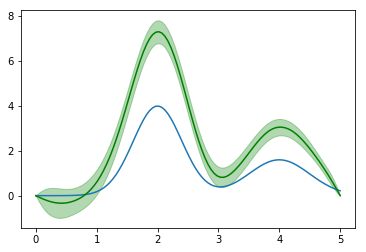

In [16]:
plt.plot(x,phi(x))

phir = phi_reconstruct(x)
phiEr = phi_reconstruct.error(x)
plt.plot(x, phir, 'g')
plt.fill_between(x, phir-phiEr, phir + phiEr, color='g', alpha=0.3);

# Solution of the matrix equation



In [17]:
from statreg.model import GaussErrorMatrixUnfolder
from statreg.basis import CubicSplines

In [18]:
cubicSplines = CubicSplines(y, boundary='dirichlet')

In [19]:
omega = cubicSplines.omega(2)

In [20]:
model = GaussErrorMatrixUnfolder(omega)

In [21]:
Kmn = cubicSplines.discretizeKernel(kernel,y)

In [22]:
result = model.solve(Kmn, f, sig)

In [23]:
phir = lambda x: sum([p*bf(x) for p, bf in zip(result.phi,cubicSplines.basisFun)])

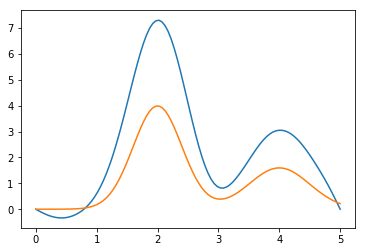

In [26]:
plt.plot(x,phir(x))
plt.plot(x,phi(x));